In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def cartoonify(input_image_path):
    img = cv2.imread(input_image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.axis("off")
    plt.imshow(img)
    plt.show()

    # Edge mask generation
    line_size = 7
    blur_value = 7
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray_img, blur_value)
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)

    plt.axis("off")
    plt.imshow(edges, cmap='gray')
    plt.show()

    # Color quantization with KMeans clustering
    from sklearn.cluster import KMeans
    k = 7
    data = img.reshape(-1, 3)
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
    img_reduced = kmeans.cluster_centers_[kmeans.labels_]
    img_reduced = img_reduced.reshape(img.shape)
    img_reduced = img_reduced.astype(np.uint8)

    plt.axis("off")
    plt.imshow(img_reduced)
    plt.show()

    # Bilateral Filter
    blurred = cv2.bilateralFilter(img_reduced, d=7, sigmaColor=200, sigmaSpace=200)
    cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)

    plt.subplot(1, 2, 1)
    plt.axis("off")
    plt.imshow(img)

    plt.subplot(1, 2, 2)
    plt.axis("off")
    plt.imshow(cartoon)
    plt.show()

    # Export cartoon to a jpg file
    cartoon_ = cv2.cvtColor(cartoon, cv2.COLOR_RGB2BGR)
    cv2.imwrite('cartoon.png', cartoon_)

**Get input image path from the user**

Enter the path of the input image: /content/input_image.jpg


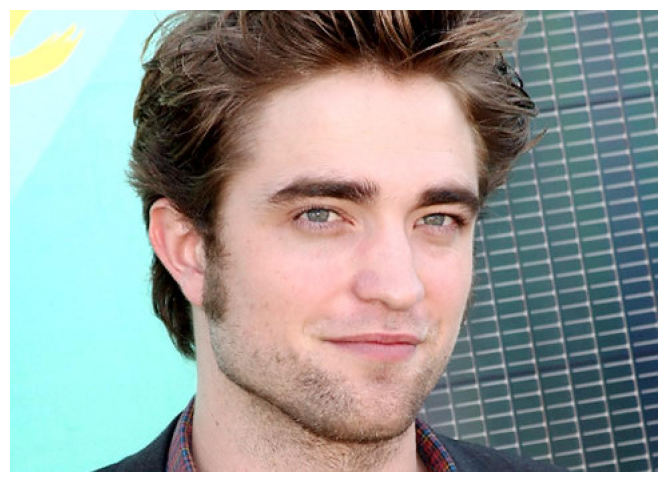

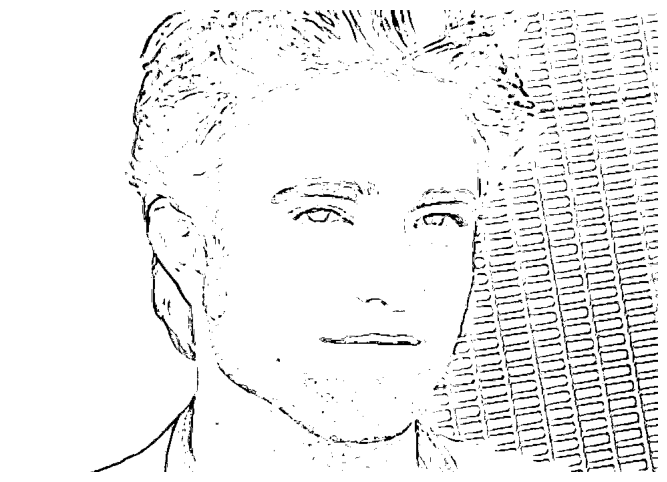

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


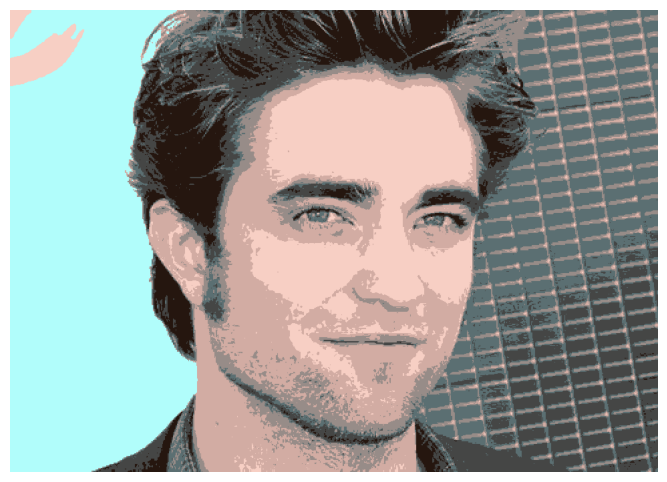

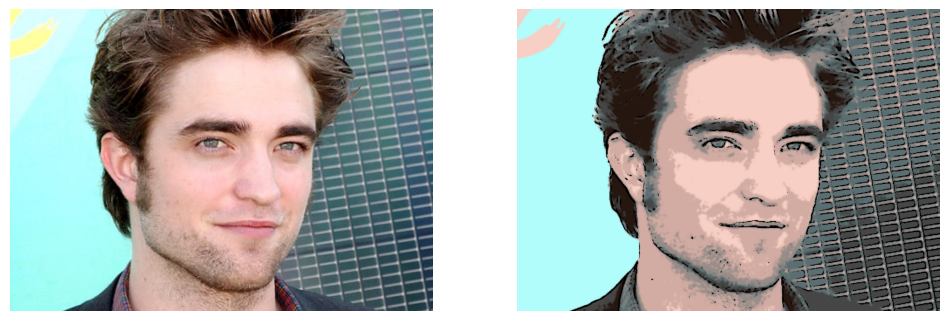

In [ ]:
input_image_path = input("Enter the path of the input image: ")
cartoonify(input_image_path)